In [1]:
#https://deeplearningsandbox.com/how-to-build-an-image-recognition-system-using-keras-and-tensorflow-for-a-1000-everyday-object-559856e04699
import sys
import argparse
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

Using TensorFlow backend.


In [2]:
# allocates GPU memory based on runtime allocations. doesn't releases memory because of potential memory fragmentation
# without this option, getting images will not work
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [3]:
model = ResNet50 (weights='imagenet')
target_size = (224, 224)

In [4]:
def predict(model, img, target_size, top_n=3):
#   """Run model prediction on image
#   Args:
#     model: keras model
#     img: PIL format image
#     target_size: (width, height) tuple
#     top_n: # of top predictions to return
#   Returns:
#     list of predicted labels and their probabilities
#   """
    if img.size != target_size:
        img = img.resize(target_size)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return decode_predictions(preds, top=top_n)[0]

In [5]:
def plot_preds(image, preds):  
#   """Displays image and the top-n predicted probabilities 
#      in a bar graph  
#   Args:    
#     image: PIL image
#     preds: list of predicted labels and their probabilities  
#   """  
    #image
    plt.imshow(image)
    plt.axis('off')

    #bar graph
    plt.figure()  
    order = list(reversed(range(len(preds))))  
    bar_preds = [pr[2] for pr in preds]
    labels = (pr[1] for pr in preds)
    plt.barh(order, bar_preds, alpha=0.5)
    plt.yticks(order, labels)
    plt.xlabel('Probability')
    plt.xlim(0, 1.01)
    plt.tight_layout()
    plt.show()

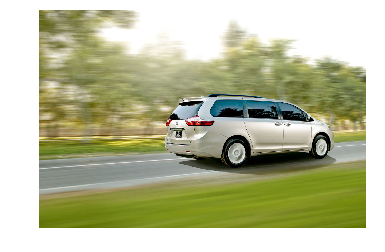

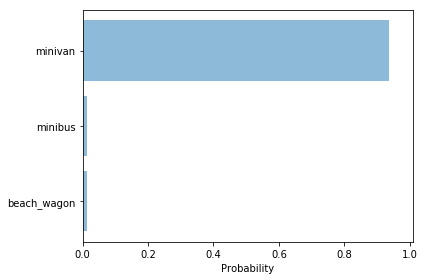

In [7]:
image_loc = 'http://i.imgur.com/cg37Ojo.jpg'

response = requests.get(image_loc)
img = Image.open(BytesIO(response.content))
preds = predict(model, img, target_size)
plot_preds(img, preds)

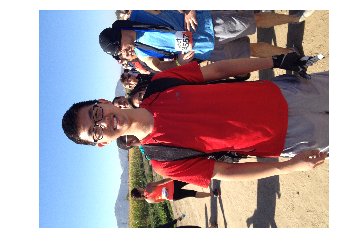

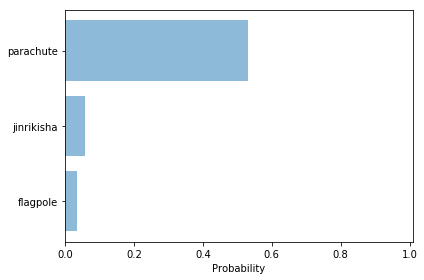

In [9]:
image_loc = 'D:\OneDrive\Pictures\IMG_0136.JPG'

img = Image.open(image_loc)
preds = predict(model, img, target_size)
plot_preds(img, preds)